# Laboratorium 2


### Konfiguracja

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as mcoll
import matplotlib.colors as mcolors
from matplotlib.widgets import Button
import json as js

class _Button_callback(object):
    def __init__(self, scenes):
        self.i = 0
        self.scenes = scenes

    def set_axis(self, ax):
        self.ax = ax
        
    def next(self, event):
        self.i = (self.i + 1) % len(self.scenes)
        self.draw()

    def prev(self, event):
        self.i = (self.i - 1) % len(self.scenes)
        self.draw()
        
    def draw(self):
        self.ax.clear()
        for collection in self.scenes[self.i].points:
            if len(collection.points) > 0:
                self.ax.scatter(*zip(*(np.array(collection.points))), **collection.kwargs)
        for collection in self.scenes[self.i].lines:
            self.ax.add_collection(collection.get_collection())
        self.ax.autoscale()
        plt.draw()

### Interfejsy

[Dostępne kolory](https://matplotlib.org/3.1.1/gallery/color/named_colors.html)

[Dostępne znaczniki punktów](https://matplotlib.org/3.1.1/api/markers_api.html#module-matplotlib.markers)

In [2]:
class Scene:
    def __init__(self, points=[], lines=[]):
        self.points=points
        self.lines=lines

class PointsCollection:
    def __init__(self, points = [], **kwargs):
        self.points = np.array(points)
        self.kwargs = kwargs

class LinesCollection:
    def __init__(self, lines = [], **kwargs):
        self.lines = lines
        self.kwargs = kwargs
        
    def add(self, line):
        self.lines.append(line)
        
    def get_collection(self):
        return mcoll.LineCollection(self.lines, **self.kwargs)
            


class Plot:
    def __init__(self, scenes = [], json = None):
        if json is None:
            self.scenes = scenes
        else:
            self.scenes = [Scene([PointsCollection(pointsCol) for pointsCol in scene["points"]], 
                                 [LinesCollection(linesCol) for linesCol in scene["lines"]]) 
                           for scene in js.loads(json)]
        
    def __configure_buttons(self, callback):
        plt.subplots_adjust(bottom=0.2)
        axprev = plt.axes([0.6, 0.05, 0.15, 0.075])
        axnext = plt.axes([0.76, 0.05, 0.15, 0.075])
        bnext = Button(axnext, 'Następny')
        bnext.on_clicked(callback.next)
        bprev = Button(axprev, 'Poprzedni')
        bprev.on_clicked(callback.prev)
        return [bprev, bnext]

    def draw(self):
        plt.close()
        callback = _Button_callback(self.scenes)
        self.widgets = self.__configure_buttons(callback)
        callback.set_axis(plt.axes())
        plt.show()
        callback.draw()
        
    def toJSON(self):
        return js.dumps([{"points": [pointCol.points.tolist() for pointCol in scene.points], 
                          "lines":[linesCol.lines for linesCol in scene.lines]} 
                         for scene in self.scenes])
    

### Przykład użycia

<IPython.core.display.Javascript object>


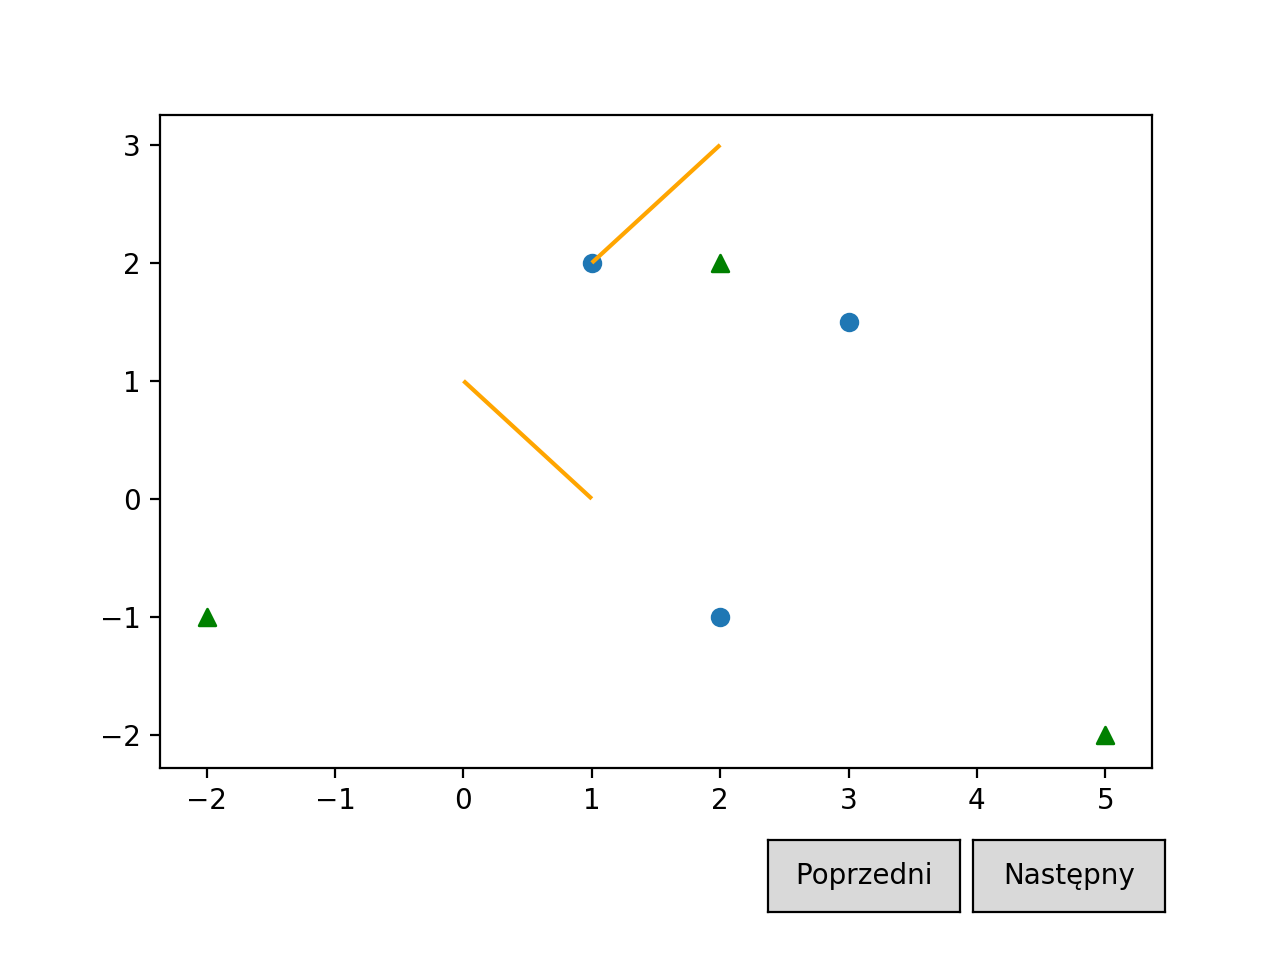

In [3]:
%matplotlib notebook

scenes=[Scene([PointsCollection([(1, 2), (3, 1.5), (2, -1)]), 
               PointsCollection([(5, -2), (2, 2), (-2, -1)], color='green', marker = "^")], 
              [LinesCollection([[(1,2),(2,3)], [(0,1),(1,0)]], color='orange')]), 
        Scene([PointsCollection([(1, 2), (-15, 1.5), (2, -1)], color='red'), 
               PointsCollection([(5, -2), (2, 2), (-2, 1)], color='black')], 
              [LinesCollection([[(-1,2),(-2,3)], [(0,-1),(-1,0)]])])]

plot = Plot(scenes)
plot.draw() 


### Rozwiązanie

In [4]:
%matplotlib notebook

#### Generowanie punktów

In [5]:
def getPointsOn2DPlain(a,b,size):
    return [np.random.uniform(a, b, size=(2,)) for _ in range(size)]

def getPointsOnCircle(R, center, size):
    return [(lambda R, t : np.array([R*np.cos(2*np.pi*t), R*np.sin(2*np.pi*t)]))(R, np.random.rand()) + center for _ in range(size)]

def getPointsOnSquare(p1,p2,p3,p4, size):
    x_min, y_min = np.min((p1,p2,p3,p4), axis=0)
    x_max, y_max = np.max((p1,p2,p3,p4), axis=0)
    
    res = [np.array([x_min, np.random.uniform(y_min, y_max)]) for _ in range(size//4)]
    res = res + [np.array([x_max, np.random.uniform(y_min, y_max)]) for _ in range(size//4)]
    res = res + [np.array([np.random.uniform(x_min, x_max), y_min]) for _ in range(size//4)]
    res = res + [np.array([np.random.uniform(x_min, x_max), y_max]) for _ in range(size//4)]
    return res

def getPointsOnSquareAndDiagonal(p1,p2,p3,p4, size_on_side, size_on_diag):
    x_min, y_min = np.min((p1,p2,p3,p4), axis=0)
    x_max, y_max = np.max((p1,p2,p3,p4), axis=0)
    res = [p1, p2, p3, p4]
    res = res + [np.array([x_min, np.random.uniform(y_min, y_max)]) for _ in range(size_on_side)]
    res = res + [np.array([x_max, np.random.uniform(y_min, y_max)]) for _ in range(size_on_side)]
    res = res + [(lambda x: np.array([x, x]))(np.random.uniform(x_min, x_max)) for _ in range(size_on_diag)]
    res = res + [(lambda x: np.array([x, y_max - x]))(np.random.uniform(x_min, x_max)) for _ in range(size_on_diag)]
    
    return res

point_set1 = getPointsOn2DPlain(-100, 100, 1000)
point_set2 = getPointsOnCircle(10, np.array([0.,0.]), 1000)
point_set3 = getPointsOnSquare(np.array([-10, 10]), np.array([-10,-10]), np.array([10, -10]), np.array([10,10]), 1000)
point_set4 = getPointsOnSquareAndDiagonal(np.array([0, 0]), np.array([10,0]), np.array([10, 10]), np.array([0,10]), 250, 200)

<IPython.core.display.Javascript object>


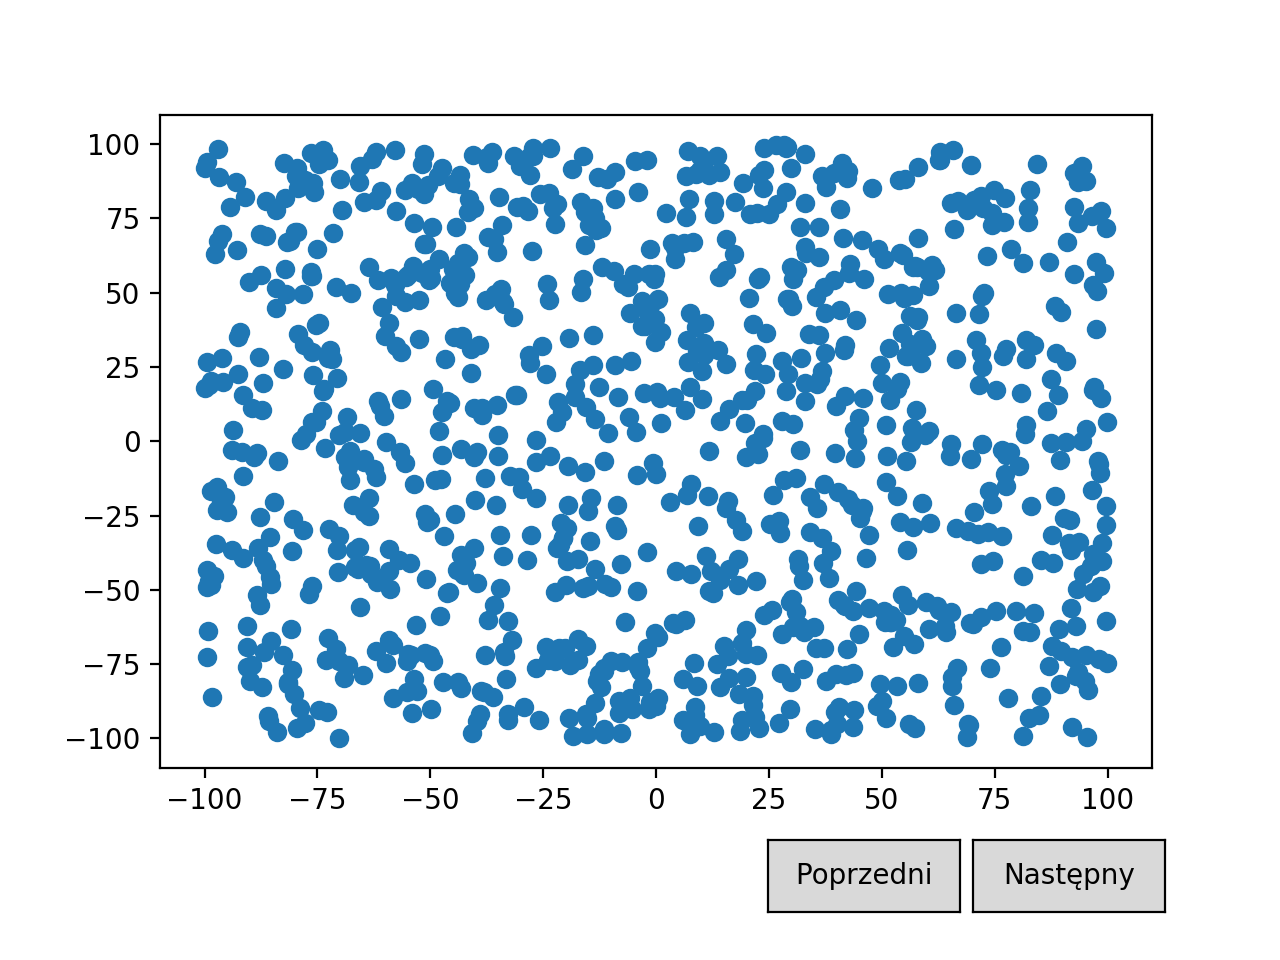

In [6]:
scenes=[Scene([PointsCollection(point_set1)]), 
        Scene([PointsCollection(point_set2)]),
        Scene([PointsCollection(point_set3)]),
        Scene([PointsCollection(point_set4)])]

plot = Plot(scenes)
plot.draw()

#### Algorytmy

In [7]:
import pickle
def pickle_hall(hall, filename):
    f = open(filename, 'wb')
    pickle.dump(hall, f)
    f.close()

In [8]:
def det(a,b,c):
    return a[0]*b[1] + a[1]*c[0] + b[0]*c[1] - b[1]*c[0] - a[1]*b[0] - a[0]*c[1]

In [9]:
def sqr_dist(a, b):
    return np.sum((a-b)**2)

In [10]:
def find_leftmost(points):
    p0 = points[0]
    idx = 0
    for i, p in enumerate(points[1:]):
        if(p0[1] > p[1]):
            p0 = p
            idx = i+1
        elif(p0[1] == p[1] and p0[0] > p[0]):
            p0 = p
            idx = i+1
    return p0, idx

#### Algorytm Grahama

In [11]:
def comparator(b, c, a, eps):
    orientation = det(a,b,c)
    if(orientation <= eps and orientation >= -eps): # są na jednej linii
        return sqr_dist(a, b) < sqr_dist(a,c)
    else:
        return orientation > eps

In [12]:
def qsort(table, l, r, comparator = lambda x,y: x<y): #comparator - function that takes 2 arguments a, b and return wether a should be placed before b
    if(l == r):
        return;
    m = (l+r) // 2
    pivot = table[m]
    j=l
    table[r-1], table[m] = table[m], table[r-1]
    for i in range(l, r-1):
        if(comparator(table[i], pivot)):
            table[i],table[j] = table[j],table[i]
            j+=1
    table[r-1], table[j] = table[j], table[r-1]
    qsort(table, l, j, comparator)
    qsort(table, j+1, r, comparator)

In [13]:
import functools # functools.partial

def put_to_convex_hall(convex_hall, p, eps):
    orientation = det(convex_hall[-2], convex_hall[-1], p)
    
    while(orientation < -eps):
        convex_hall.pop()
        orientation = det(convex_hall[-2], convex_hall[-1], p)
    
    if(orientation > eps):
        convex_hall.append(p)
    elif(orientation <= eps and orientation >= -eps):
        convex_hall.pop()
        convex_hall.append(p)
            
def graham(pns, eps=np.float(0.), write_to_file=False, filename='convex_hall.pickle'):
    points = pns.copy()
    
    p0,_ = find_leftmost(points)
    
    cmp = functools.partial(comparator, a=p0, eps=eps)
    
    qsort(points, 0, len(points), cmp)
    
    convex_hall = [points[0], points[1], points[2]]
    for p in points[3:]:
        put_to_convex_hall(convex_hall, p, eps)
        
    if(write_to_file):
        pickle_hall(convex_hall, filename)
    return convex_hall

#### Algorytm Jarvisa

In [14]:
def jarvis(points, eps=np.float(0.), write_to_file=False, filename='convex_hall.pickle'):
    _, idx0 = find_leftmost(points)
    
    convex_hall = []
    n = len(points)
    
    p = idx0
    q = 0
    
    while(True):
        convex_hall.append(points[p])
        
        q = (p+1)%n
        
        for idx, k in enumerate(points):
            if(idx == p or idx == q):continue
            
            orientation = det(points[p], points[q], k)
            if(orientation < -eps):
                q = idx
            elif(orientation <= eps and orientation >= -eps):
                if(sqr_dist(points[p], points[q]) < sqr_dist(points[p], k)):
                    q = idx
        
        p = q
        
        if(p == idx0):break
            
    if(write_to_file):
        pickle_hall(convex_hall, filename)
    
    return convex_hall

#### Check the functions

In [15]:
%matplotlib notebook
import time
def checkOnSets(func, sets_with_name, eps=np.float(1e-10)):
    scenes = []
    for point_set, name in sets_with_name:
        start = time.time()
        hall = func(point_set, eps=eps)
        end = time.time()
        
        lines = []
        p = hall[0]
        for i in hall[1:]:
            lines.append([p, i])
            p = i
        lines.append([hall[0], hall[-1]])
        
        print('on set: %s time is: %f, and %d points on hall' % (name, end-start, len(hall)))
        
        scenes.append(Scene([PointsCollection(point_set.copy(), s=12), PointsCollection(hall.copy(), marker='^', s=24)], [LinesCollection(lines.copy(), color='red')]))

    return Plot(scenes.copy())

In [16]:
point_sets = [(point_set1, 'plain2D'), (point_set2, 'circle'), (point_set3, 'square'), (point_set4, 'square with diagonals')]

on set: plain2D time is: 0.035992, and 17 points on hall
on set: circle time is: 0.029307, and 842 points on hall
on set: square time is: 0.056576, and 9 points on hall
on set: square with diagonals time is: 0.160590, and 4 points on hall


<IPython.core.display.Javascript object>


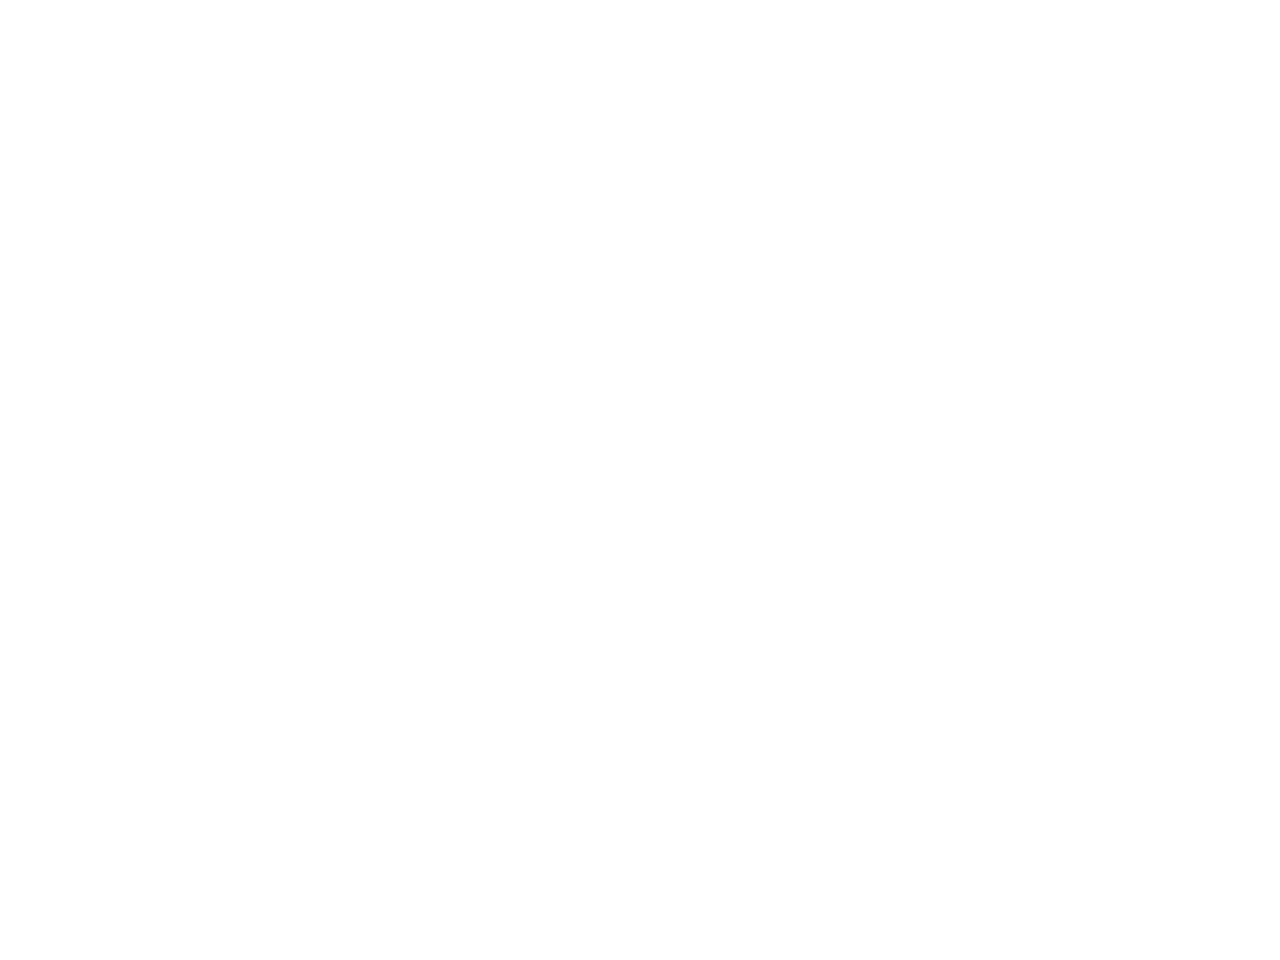

In [17]:
%matplotlib notebook
plot = checkOnSets(graham, point_sets, eps=np.float(1e-6))
plot.draw()

on set: plain2D time is: 0.034302, and 17 points on hall
on set: circle time is: 1.607059, and 843 points on hall
on set: square time is: 0.030439, and 8 points on hall
on set: square with diagonals time is: 0.052920, and 4 points on hall


<IPython.core.display.Javascript object>


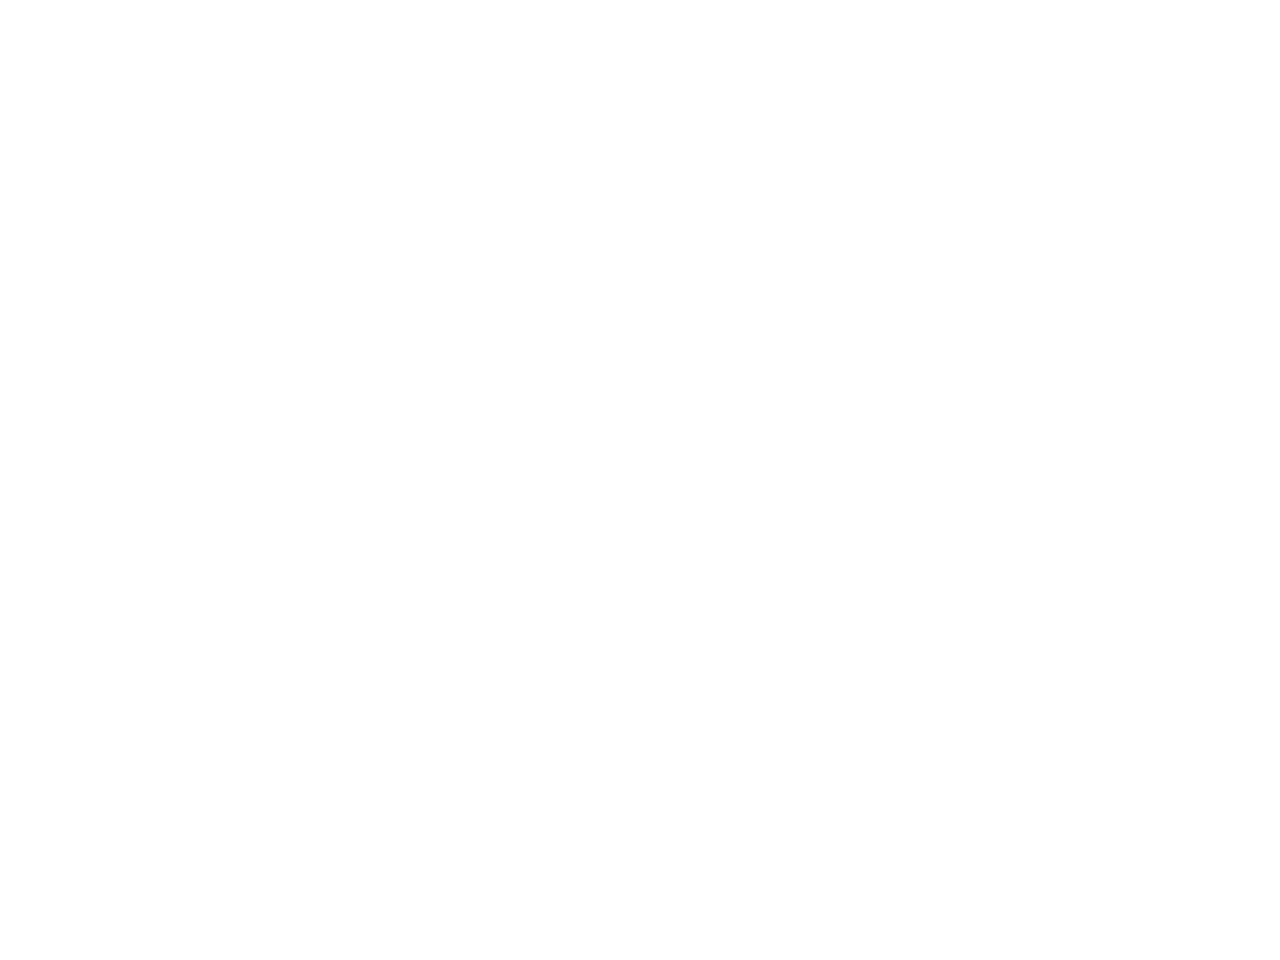

In [18]:
%matplotlib notebook
plot = checkOnSets(jarvis, point_sets, eps=np.float(1e-6))
plot.draw()

#### Aniamcję 

#### Graham

Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 215, in process
    func(*args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/animation.py", line 1478, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


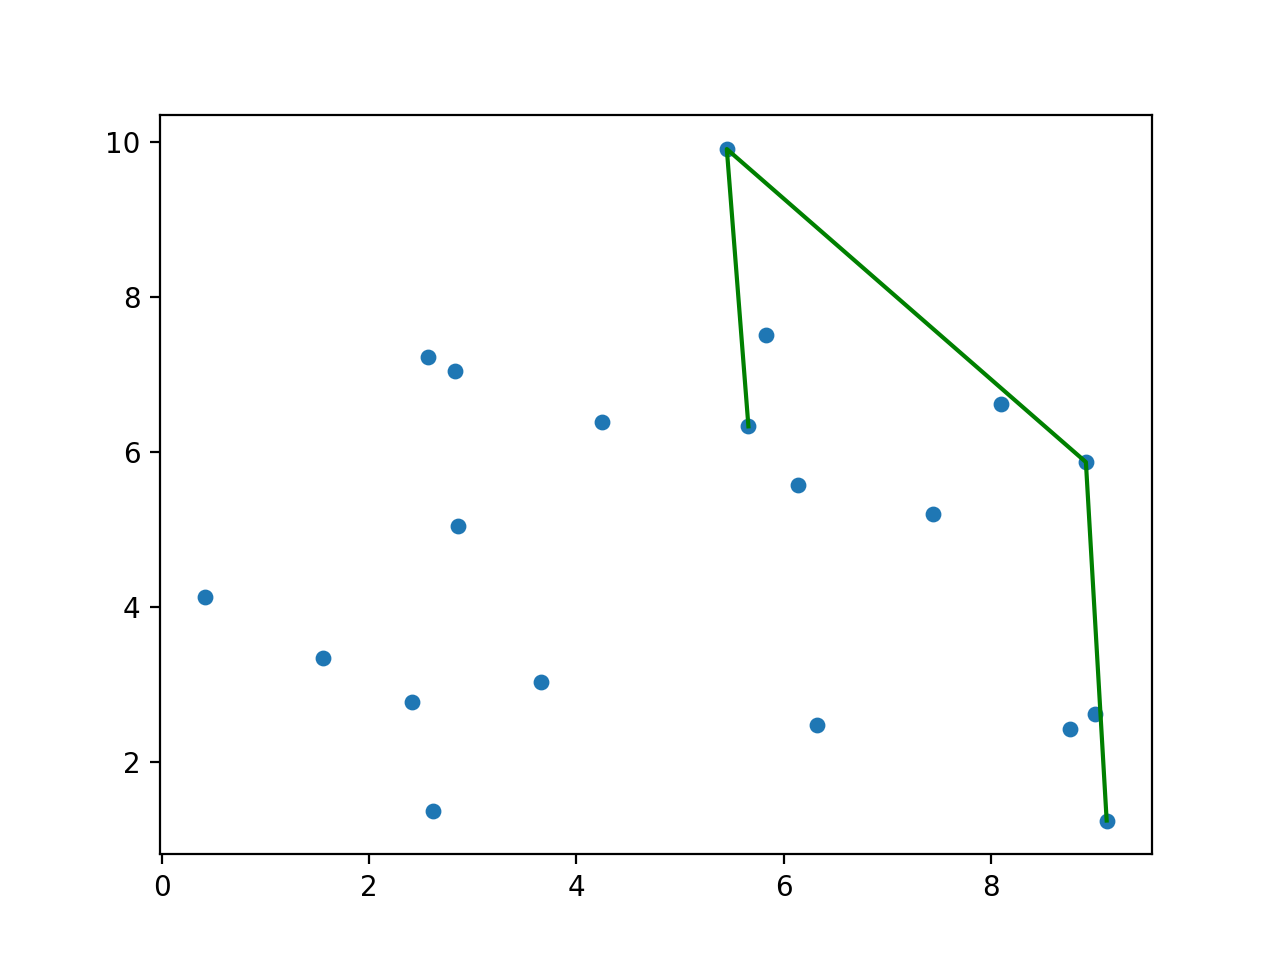

In [40]:
%matplotlib notebook 

import matplotlib.animation as animation

points_to_visualize = getPointsOn2DPlain(0, 10, 20)

eps = np.float(1e-6)
p0, _ = find_leftmost(points_to_visualize)
cmp = functools.partial(comparator, a=p0, eps=eps)

qsort(points_to_visualize, 0, len(points_to_visualize), cmp)
points_to_visualize = np.array(points_to_visualize)

hall = [points_to_visualize[0], points_to_visualize[1], points_to_visualize[2]]

idx = 3
p = None
plt.close()
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(*zip(*points_to_visualize), s=22)
stop_animation = False

def animate(i):
    global points_to_visualize, idx, hall, p, eps, stop_animation,anim 
    ax.clear()
    ax.scatter(*zip(*points_to_visualize), s=22)
    #ax.scatter(*zip(*np.array(hall)), marker='^',color='green')
    #ax.plot(hall, color='green')
    if(p is None):
        if(idx < len(points_to_visualize)):
            p = points_to_visualize[idx]
            idx += 1
            ax.plot(*zip(*np.array(hall)), color='green')
            ax.scatter(*zip(*np.array(hall)), marker='^', color='green')
            ax.plot(*zip(*[hall[-1], p]), color='red', linestyle='dashed')
        else:
            if stop_animation:
                anim.running = False
            hall.append(hall[0])
            ax.plot(*zip(*np.array(hall)), color='green')
            ax.scatter(*zip(*np.array(hall)), marker='^', color='green')
            stop_animation = True
    else:
        orientation = det(hall[-2], hall[-1], p)
        if(orientation < -eps):
            hall.pop()
            ax.plot(*zip(*np.array(hall)), color='green')
            ax.scatter(*zip(*np.array(hall)), marker='^', color='green')
            ax.plot(*zip(*[hall[-1], p]), color='red', linestyle='dashed')
        else:
            if(orientation > eps):
                hall.append(p)
                p=None
            elif(orientation <= eps and orientation >= -eps):
                hall.pop()
                hall.append(p)
                p=None
            ax.plot(*zip(*np.array(hall)), color='green')

anim = animation.FuncAnimation(fig, animate, interval=1000, repeat=True)
#anim.save('animacja_graham.mp4')

#### Jarvis 

<IPython.core.display.Javascript object>


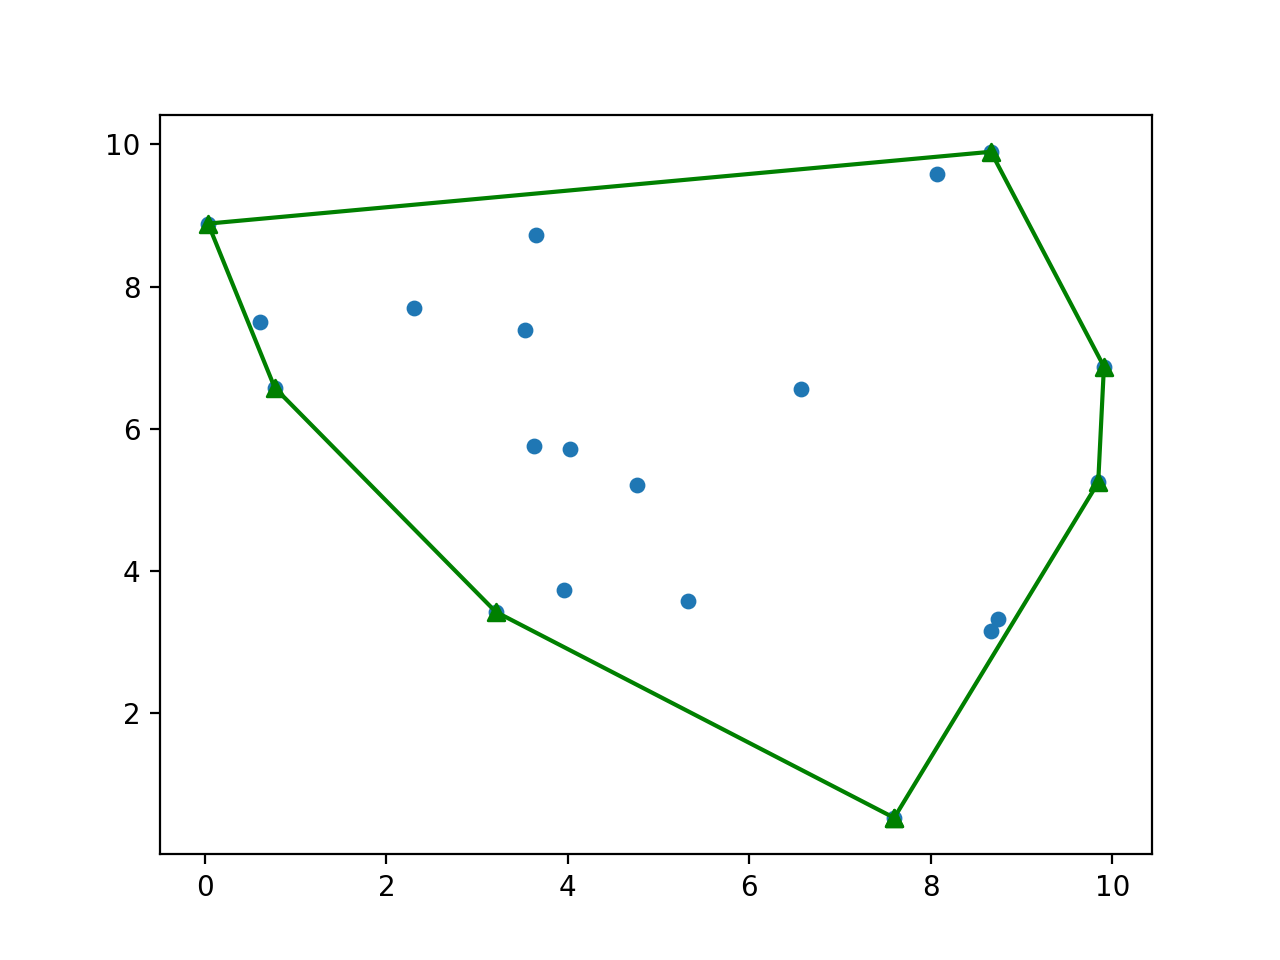

In [44]:
%matplotlib notebook 

import matplotlib.animation as animation

points_to_visualize = getPointsOn2DPlain(0, 10, 20)

eps = np.float(1e-6)
_, idx0 = find_leftmost(points_to_visualize)

hall = [idx0]
n = len(points_to_visualize)
p = idx0
q = (p+1)%n

plt.close()
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(*zip(*points_to_visualize), s=22)

points_to_visualize = np.array(points_to_visualize)
idx = 0

def animate(i):
    global hall, points_to_visualize, idx, n, eps, anim, p, q
    ax.clear()
    ax.scatter(*zip(*points_to_visualize), s=22)
    ax.plot(*zip(*points_to_visualize[hall]), color='green')
    ax.scatter(*zip(*points_to_visualize[hall]), color='green', marker='^')
    
    if(len(hall) > 1 and hall[-1] == hall[0]):
        anim.running = False
    else:
        while(idx == p or idx == q):
                idx+=1
        
        if(idx < n):
            k = points_to_visualize[idx]
            
            ax.plot(*zip(*[points_to_visualize[p], points_to_visualize[q]]), color='green', linestyle='dashed')
            ax.plot(*zip(*[points_to_visualize[q], k]), color='red', linestyle='dashed')
            orientation = det(points_to_visualize[p], points_to_visualize[q], k)
            
            if(orientation < -eps):
                q = idx
            elif(orientation <= eps and orientation >= -eps):
                if(sqr_dist(points_to_visualize[p], points_to_visualize[q]) < sqr_dist(points_to_visualize[p], k)):
                    q = idx
            idx+=1
            
        else:
            p = q
            hall.append(p)
            idx = 0
            q = (p+1)%n

anim = animation.FuncAnimation(fig, animate, interval=1000, repeat=True)
#anim.save('jarvis_animation.mp4')